## MCQ Probability Calculator (using different models)

Arvid Lundervold, 2025-01-22

In an exam, there are 8 MCQ questions with 5 options each, of which precisely 2 are correct.  You will get 3 points for exactly 1 correct answer, 5 points for 2 correct answers, and 0 points otherwise. Make a python program that calculates and plots the probability of getting at least n points on the MCQ questions by chance on the exam, for n=0, 1, ..., 40.

ChatGPT-o1: 


Thought about probability and plotting for 12 seconds

Here is a self-contained Python script that both calculates and plots the probability of scoring at least n points (for n from 0 to 40) by random guessing on eight multiple-select questions. Each question can yield a score of 0, 3, or 5 with probabilities 0.25, 0.50, and 0.25, respectively.

In the script, the probability distribution over total scores from 0 to 40 is computed through repeated convolution, summing up the single-question distribution eight times. After obtaining these probabilities for exact scores, the script derives the probability of scoring at least n points by simply summing from n to 40. It then uses matplotlib to produce a simple line plot.

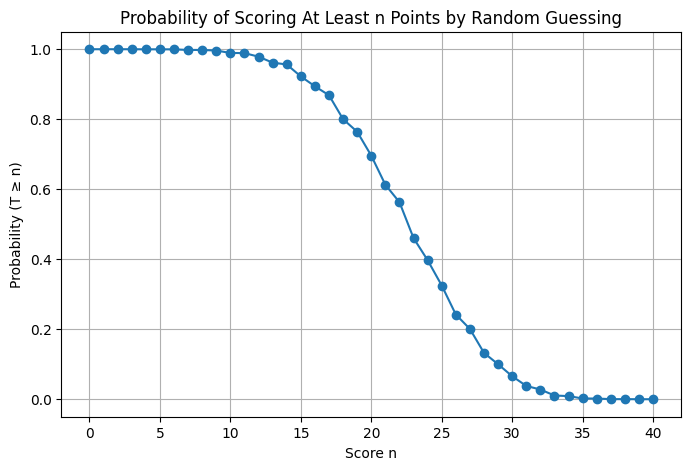

Score ≥ 0: 1.000000
Score ≥ 1: 0.999985
Score ≥ 2: 0.999985
Score ≥ 3: 0.999985
Score ≥ 4: 0.999741
Score ≥ 5: 0.999741
Score ≥ 6: 0.999619
Score ≥ 7: 0.997910
Score ≥ 8: 0.997910
Score ≥ 9: 0.996201
Score ≥ 10: 0.989365
Score ≥ 11: 0.988937
Score ≥ 12: 0.978683
Score ≥ 13: 0.961594
Score ≥ 14: 0.956467
Score ≥ 15: 0.922287
Score ≥ 16: 0.894089
Score ≥ 17: 0.868454
Score ≥ 18: 0.800095
Score ≥ 19: 0.764206
Score ≥ 20: 0.695847
Score ≥ 21: 0.612747
Score ≥ 22: 0.562943
Score ≥ 23: 0.460403
Score ≥ 24: 0.397171
Score ≥ 25: 0.324905
Score ≥ 26: 0.242020
Score ≥ 27: 0.200760
Score ≥ 28: 0.132401
Score ≥ 29: 0.099930
Score ≥ 30: 0.065750
Score ≥ 31: 0.037979
Score ≥ 32: 0.027725
Score ≥ 33: 0.010635
Score ≥ 34: 0.008926
Score ≥ 35: 0.002090
Score ≥ 36: 0.001968
Score ≥ 37: 0.000259
Score ≥ 38: 0.000259
Score ≥ 39: 0.000015
Score ≥ 40: 0.000015


In [13]:
import matplotlib.pyplot as plt

def mcq_probability_at_least():
    # Single-question probabilities: 0 points (p=0.25), 3 points (p=0.50), 5 points (p=0.25)
    single_q_probs = {0: 0.25, 3: 0.50, 5: 0.25}
    max_score = 8 * 5  # 8 questions * 5 points = 40
    
    # p_total[s] will hold P(T = s), where T is the total score
    p_total = [0.0] * (max_score + 1)
    p_total[0] = 1.0
    
    # Convolve the distribution for each of the 8 questions
    for _ in range(8):
        new_p_total = [0.0] * (max_score + 1)
        for score_so_far in range(max_score + 1):
            if p_total[score_so_far] > 0:
                for q_score, q_prob in single_q_probs.items():
                    new_score = score_so_far + q_score
                    new_p_total[new_score] += p_total[score_so_far] * q_prob
        p_total = new_p_total
    
    # Compute the probability of scoring at least n points for n in [0..40]
    probabilities_at_least = []
    for n in range(max_score + 1):
        probabilities_at_least.append(sum(p_total[n:]))
    
    # Plot the results
    plt.figure(figsize=(8, 5))
    plt.plot(range(max_score + 1), probabilities_at_least, marker='o')
    plt.title("Probability of Scoring At Least n Points by Random Guessing")
    plt.xlabel("Score n")
    plt.ylabel("Probability (T ≥ n)")
    plt.grid(True)
    plt.show()
    
    # Print the values to the console
    for n, prob in enumerate(probabilities_at_least):
        print(f"Score ≥ {n}: {prob:.6f}")

if __name__ == "__main__":
    mcq_probability_at_least()


The key ideas are that each question follows the same distribution of possible scores (0, 3, 5), and that after eight independent questions, one can iterate a discrete convolution to build the final distribution of total scores. Summing from n through 40 in the final array gives the probability of achieving at least n points. The plot displays how that probability decays as n increases, and the printed values offer a numeric view of the cumulative probabilities.

_Could you confirm the calculations by trying a quite different approach to the task?_

Thought about alternative approaches for probability for 26 seconds


Below is an example of a completely different way to confirm the same probability distribution: a Monte Carlo simulation. Rather than computing the distribution analytically via repeated convolution, we randomly guess answers for a large number of simulated “students,” tally their scores, and estimate probabilities empirically. Because this approach relies on random sampling, results will fluctuate slightly from run to run, but with enough trials, you can get very close to the exact distribution.

This script does the following:

1. Simulates random answers for each of the 8 questions.  
2. For each question, randomly picks one of the 2^5 = 32 possible answer-subsets (including picking no options, or all 5, etc.) with equal probability.  
3. Determines how many of the correct 2 options are selected:  
   • 0 correct ⇒ 0 points,  
   • 1 correct ⇒ 3 points,  
   • 2 correct ⇒ 5 points,  
   • anything above 2 correct (which is impossible if there are only 2 correct) also yields 0.  
4. Repeats the process for a large number of simulated test takers (e.g., 2 million).  
5. Estimates P(T = s) as (# with total score = s) / (number of trials).  
6. From the distribution of exact scores, it computes P(T ≥ n) = sum_{s ≥ n} P(T = s) for n in 0..40.  

Because this method uses truly random picks among all 32 subsets, it matches how the question states “by chance” when each subset is equally likely.



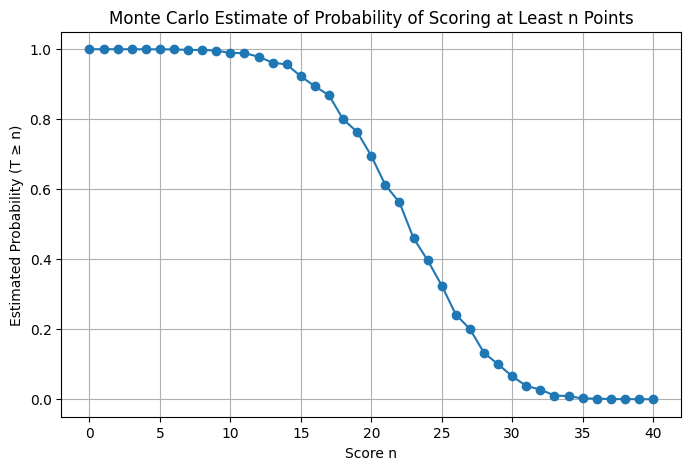

Score ≥  0: 1.000000
Score ≥  1: 0.999980
Score ≥  2: 0.999980
Score ≥  3: 0.999980
Score ≥  4: 0.999744
Score ≥  5: 0.999744
Score ≥  6: 0.999621
Score ≥  7: 0.997903
Score ≥  8: 0.997903
Score ≥  9: 0.996204
Score ≥ 10: 0.989292
Score ≥ 11: 0.988877
Score ≥ 12: 0.978597
Score ≥ 13: 0.961557
Score ≥ 14: 0.956484
Score ≥ 15: 0.922453
Score ≥ 16: 0.894024
Score ≥ 17: 0.868406
Score ≥ 18: 0.799717
Score ≥ 19: 0.763663
Score ≥ 20: 0.695220
Score ≥ 21: 0.611953
Score ≥ 22: 0.562285
Score ≥ 23: 0.460086
Score ≥ 24: 0.397078
Score ≥ 25: 0.324838
Score ≥ 26: 0.241986
Score ≥ 27: 0.200584
Score ≥ 28: 0.132420
Score ≥ 29: 0.099782
Score ≥ 30: 0.065653
Score ≥ 31: 0.037950
Score ≥ 32: 0.027641
Score ≥ 33: 0.010574
Score ≥ 34: 0.008884
Score ≥ 35: 0.002077
Score ≥ 36: 0.001955
Score ≥ 37: 0.000269
Score ≥ 38: 0.000269
Score ≥ 39: 0.000014
Score ≥ 40: 0.000014


In [23]:
import random
import matplotlib.pyplot as plt

def mcq_probability_monte_carlo(num_trials=2_000_000):
    """
    Monte Carlo simulation to estimate P(T >= n), where T is the total score
    from 8 multi-select questions guessed at random.

    Each question has 5 possible options, 2 of which are correct.
    Scoring rule: 
      - 3 points if exactly 1 correct option is selected
      - 5 points if exactly 2 correct options are selected
      - 0 points otherwise
    """
    # We'll track how often each total score (0..40) occurs.
    max_score = 40
    score_counts = [0] * (max_score + 1)
    
    # Precompute all subsets of 5 options as equally likely.
    # Each subset can be represented by an integer 0..31 (binary).
    # For each subset, figure out how many correct it has, then 
    # what score results (0, 3, or 5).
    # There are 2 correct and 3 incorrect among the 5 options.
    subset_scores = []
    for subset in range(32):
        # Count how many of the 2 correct answers are in 'subset'.
        # Suppose the correct answers are in positions 0 and 1.
        # Then check bits 0..1.
        # (In reality, it doesn't matter which bits represent correct vs not,
        #  as long as we do it consistently. We just want exactly 2 correct in total.)
        num_correct = 0
        # check if bit 0 is set
        if subset & 1:
            num_correct += 1
        # check if bit 1 is set
        if subset & 2:
            num_correct += 1
        # Similarly for the 3 incorrect bits (bits 2,3,4),
        # but actually we only care about how many correct in total,
        # which is either 0,1, or 2 if subset includes them.
        
        # Score logic
        if num_correct == 1:
            score_for_subset = 3
        elif num_correct == 2:
            score_for_subset = 5
        else:
            score_for_subset = 0
        
        subset_scores.append(score_for_subset)
    
    for _ in range(num_trials):
        total_score = 0
        for _q in range(8):
            # pick one of the 32 subsets uniformly at random
            subset_choice = random.randint(0, 31)
            total_score += subset_scores[subset_choice]
        score_counts[total_score] += 1
    
    # Convert counts to probabilities
    p_exact = [count / num_trials for count in score_counts]
    
    # Now compute P(T >= n) for n in 0..40
    p_at_least = []
    cumulative_sum = 0.0
    # We'll go from the highest score down to 0 to make a cumulative sum easily
    running_sum = 0.0
    for s in reversed(range(max_score + 1)):
        running_sum += p_exact[s]
        p_at_least.append(running_sum)
    # p_at_least now is reversed, so flip it
    p_at_least.reverse()
    
    # Plot the probabilities
    plt.figure(figsize=(8,5))
    plt.plot(range(max_score + 1), p_at_least, marker='o', linestyle='-')
    plt.xlabel('Score n')
    plt.ylabel('Estimated Probability (T ≥ n)')
    plt.title('Monte Carlo Estimate of Probability of Scoring at Least n Points')
    plt.grid(True)
    plt.show()
    
    # Print results
    for n in range(max_score + 1):
        print(f"Score ≥ {n:2d}: {p_at_least[n]:.6f}")

if __name__ == "__main__":
    mcq_probability_monte_carlo()


Explanation of this alternate method:

1. **Precomputation of Single-Question Outcomes**  
   We create a list `subset_scores` of length 32, one entry per possible subset of the 5 options (since each question has $2^5 = 32$ subsets). We decide which bits correspond to the correct answers and count how many correct bits are set. If that is 1, the score is 3, if 2, the score is 5, otherwise 0.

2. **Monte Carlo Loop**  
   For each “student” (out of `num_trials` simulations), we do 8 random picks among those 32 subsets. We sum the question scores to get a total score from 0 to 40, then increment a counter for that total score.

3. **Probability Distribution and Plot**  
   After the simulation, we convert raw counts into probabilities for each score. We accumulate these probabilities from the top down to get $P(T \ge n)$. Finally, we plot and print the results.

Although this approach relies on random simulation (and hence yields approximate probabilities), you should see that as you increase `num_trials`, the results converge very closely to the probabilities obtained from the exact dynamic-programming (convolution) method. This serves as a strong, qualitatively different confirmation of the same distribution.

Gemini Advanced 1.5 Pro

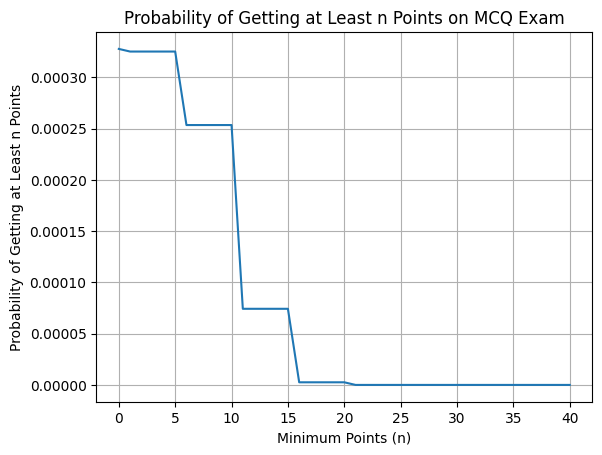

In [25]:
import matplotlib.pyplot as plt

def probability_at_least_n_points(n):
  """
  Calculates the probability of getting at least n points on the MCQ questions by chance.

  Args:
    n: The minimum number of points.

  Returns:
    The probability.
  """
  total_probability = 0
  for correct_answers in range(8 + 1):
    for correct_pairs in range(min(correct_answers // 2 + 1, 8 // 2 + 1)):
      # Calculate the number of ways to get the given number of correct answers and pairs.
      combinations = (
          binomial_coefficient(8, correct_answers)
          * binomial_coefficient(correct_answers, 2 * correct_pairs)
          * binomial_coefficient(8 - correct_answers, 2 * (4 - correct_pairs))
      )
      # Calculate the probability of this outcome.
      probability = (
          combinations
          * (1 / 5) ** (2 * correct_pairs)
          * (1 / 5) ** (2 * (4 - correct_pairs))
          * (3 / 5) ** (8 - 2 * correct_pairs - 2 * (4 - correct_pairs))
      )
      # Calculate the points for this outcome.
      points = 3 * (correct_answers - 2 * correct_pairs) + 5 * correct_pairs
      # Add the probability to the total if the points are at least n.
      if points >= n:
        total_probability += probability
  return total_probability


def binomial_coefficient(n, k):
  """
  Calculates the binomial coefficient (n choose k).

  Args:
    n: The total number of items.
    k: The number of items to choose.

  Returns:
    The binomial coefficient.
  """
  if k < 0 or k > n:
    return 0
  if k == 0 or k == n:
    return 1
  k = min(k, n - k)
  result = 1
  for i in range(k):
    result = result * (n - i) // (i + 1)
  return result


# Calculate the probabilities for n = 0, 1, ..., 40.
probabilities = []
for n in range(41):
  probabilities.append(probability_at_least_n_points(n))

# Plot the probabilities.
plt.plot(range(41), probabilities)
plt.xlabel("Minimum Points (n)")
plt.ylabel("Probability of Getting at Least n Points")
plt.title("Probability of Getting at Least n Points on MCQ Exam")
plt.grid(True)
plt.show()

Gemini Advanced 1.5 Pro (second trial):

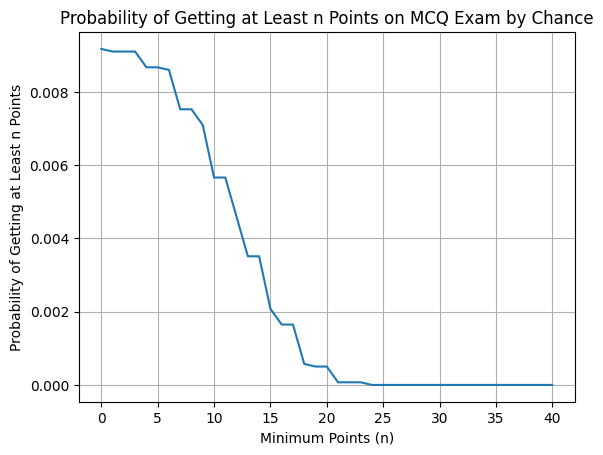

In [20]:
import matplotlib.pyplot as plt
from scipy.special import comb

def probability_at_least_n_points(n):
    """
    Calculates the probability of getting at least n points on the MCQ questions by chance.

    Args:
      n: The minimum number of points.

    Returns:
      The probability.
    """
    total_probability = 0
    for correct_answers in range(8 + 1):
        for correct_pairs in range(min(correct_answers // 2, 8 // 2) + 1):
            # Calculate the number of ways to get the given number of correct answers and pairs
            num_combinations = comb(8, correct_answers) * comb(correct_answers, 2 * correct_pairs) * comb(8 - correct_answers, 2 - 2 * correct_pairs)

            # Calculate the probability of this combination
            probability = num_combinations / 5**8

            # Calculate the points for this combination
            points = correct_pairs * 5 + (correct_answers - 2 * correct_pairs) * 3

            # Add the probability to the total if the points are at least n
            if points >= n:
                total_probability += probability
    return total_probability


# Calculate probabilities for n = 0, 1, ..., 40
probabilities = []
for n in range(41):
    probabilities.append(probability_at_least_n_points(n))

# Plot the probabilities
plt.plot(range(41), probabilities)
plt.xlabel("Minimum Points (n)")
plt.ylabel("Probability of Getting at Least n Points")
plt.title("Probability of Getting at Least n Points on MCQ Exam by Chance")
plt.grid(True)
plt.show()

Claude 3.5 Sonnet (Formal)

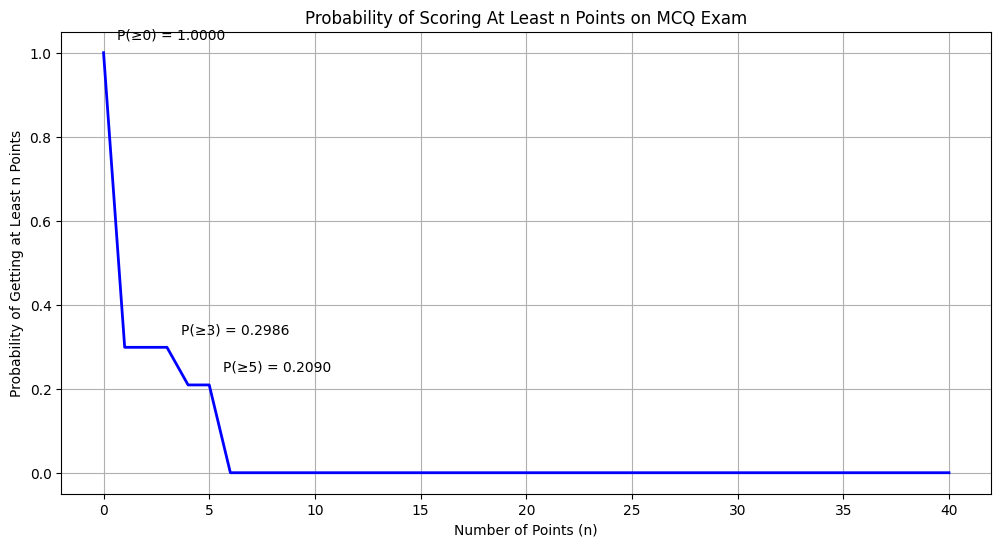


Probabilities for key point values:
P(getting at least 0 points) = 1.0000
P(getting at least 3 points) = 0.2986
P(getting at least 5 points) = 0.2090


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import hypergeom

def calculate_score_probability(num_questions=8):
    # Probability distribution of getting k correct answers
    # Using hypergeometric distribution since we're selecting without replacement
    # for each question
    probs = np.zeros(num_questions + 1)
    
    # For each question, calculate probability of getting k correct answers
    for k in range(num_questions + 1):
        # Probability of getting exactly k correct answers across all questions
        prob = 1.0
        for q in range(num_questions):
            if q < k:
                # Need to get correct (2/5 probability)
                prob *= 2/5
            else:
                # Need to get incorrect (3/5 probability)
                prob *= 3/5
        # Multiply by number of ways to choose which k questions to get correct
        prob *= len(list(combinations(range(num_questions), k)))
        probs[k] = prob
    
    return probs

def map_to_points(probs):
    # Map number of correct answers to points
    # 1 correct = 3 points
    # 2 correct = 5 points
    # otherwise = 0 points
    point_probs = np.zeros(41)  # 0 to 40 points possible
    
    # 0 points: 0 correct or 3+ correct
    point_probs[0] = sum(probs[i] for i in range(len(probs)) if i == 0 or i >= 3)
    
    # 3 points: exactly 1 correct
    point_probs[3] = probs[1]
    
    # 5 points: exactly 2 correct
    point_probs[5] = probs[2]
    
    return point_probs

def calculate_at_least_n_points(point_probs):
    # Calculate probability of getting at least n points
    at_least_n = np.zeros(len(point_probs))
    for n in range(len(point_probs)):
        at_least_n[n] = sum(point_probs[i] for i in range(n, len(point_probs)))
    return at_least_n

def plot_probabilities(at_least_n):
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(at_least_n)), at_least_n, 'b-', linewidth=2)
    plt.grid(True)
    plt.xlabel('Number of Points (n)')
    plt.ylabel('Probability of Getting at Least n Points')
    plt.title('Probability of Scoring At Least n Points on MCQ Exam')
    
    # Add specific probability labels at key points
    for points in [0, 3, 5]:
        plt.annotate(f'P(≥{points}) = {at_least_n[points]:.4f}', 
                    xy=(points, at_least_n[points]),
                    xytext=(10, 10), textcoords='offset points')
    
    plt.show()

# Calculate and plot the probabilities
from itertools import combinations
score_probs = calculate_score_probability()
point_probs = map_to_points(score_probs)
at_least_n = calculate_at_least_n_points(point_probs)
plot_probabilities(at_least_n)

# Print the probabilities for key point values
print("\nProbabilities for key point values:")
for points in [0, 3, 5]:
    print(f"P(getting at least {points} points) = {at_least_n[points]:.4f}")

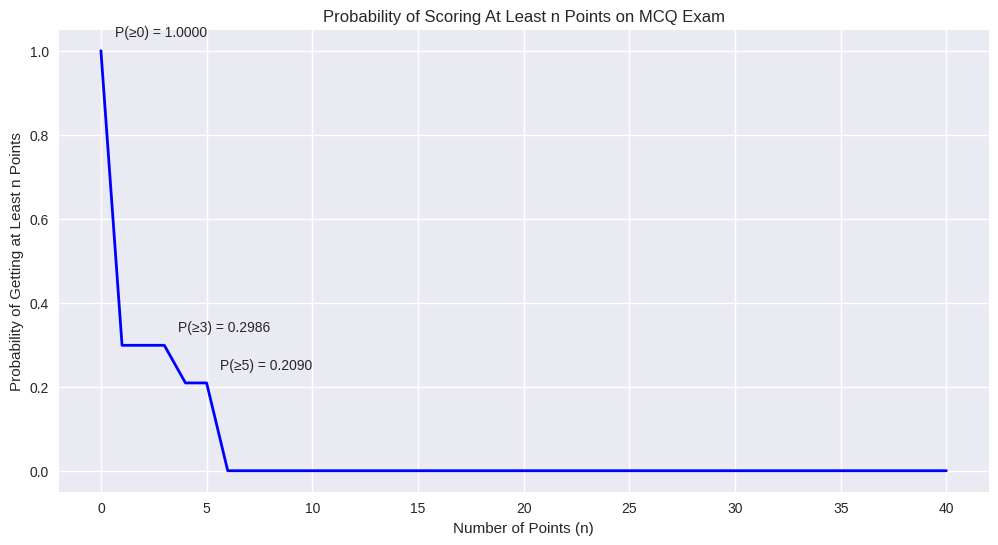


Probabilities for key point values:
P(getting at least 0 points) = 1.0000
P(getting at least 3 points) = 0.2986
P(getting at least 5 points) = 0.2090


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

def calculate_correct_probabilities(num_questions=8):
    """Calculate probability of getting k correct answers with 2/5 probability per question"""
    # For each question, probability of correct = 2/5 (selecting one of two correct out of five options)
    p_correct = 2/5
    k = np.arange(num_questions + 1)  # 0 to 8 correct answers
    # Use binomial distribution since each question is independent with same probability
    probs = binom.pmf(k, num_questions, p_correct)
    return probs

def map_to_points(probs):
    """Map number of correct answers to points
    1 correct = 3 points
    2 correct = 5 points
    otherwise = 0 points"""
    point_probs = np.zeros(41)  # 0 to 40 points possible
    
    # 0 points: 0 correct or 3+ correct
    point_probs[0] = sum(probs[i] for i in [0] + list(range(3, len(probs))))
    
    # 3 points: exactly 1 correct
    point_probs[3] = probs[1]
    
    # 5 points: exactly 2 correct
    point_probs[5] = probs[2]
    
    return point_probs

def calculate_at_least_n_points(point_probs):
    """Calculate probability of getting at least n points"""
    at_least_n = np.zeros_like(point_probs)
    for n in range(len(point_probs)):
        at_least_n[n] = sum(point_probs[i] for i in range(n, len(point_probs)))
    return at_least_n

def plot_probabilities(at_least_n):
    """Plot probability of getting at least n points"""
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(at_least_n)), at_least_n, 'b-', linewidth=2)
    plt.grid(True)
    plt.xlabel('Number of Points (n)')
    plt.ylabel('Probability of Getting at Least n Points')
    plt.title('Probability of Scoring At Least n Points on MCQ Exam')
    
    # Add specific probability labels at key points
    for points in [0, 3, 5]:
        plt.annotate(f'P(≥{points}) = {at_least_n[points]:.4f}', 
                    xy=(points, at_least_n[points]),
                    xytext=(10, 10), textcoords='offset points')
    
    plt.show()

# Calculate probabilities
correct_probs = calculate_correct_probabilities()
point_probs = map_to_points(correct_probs)
at_least_n = calculate_at_least_n_points(point_probs)

# Plot and print results
plot_probabilities(at_least_n)

print("\nProbabilities for key point values:")
for points in [0, 3, 5]:
    print(f"P(getting at least {points} points) = {at_least_n[points]:.4f}")


Single question statistics:
P(incorrect) = 0.600
P(one correct) = 0.400
P(two correct) = 0.000
Expected points per question = 1.200

Points calculation:
Maximum possible points = 24
Points per correct answer = 3
Question 1: Max points so far = 5
Question 2: Max points so far = 10
Question 3: Max points so far = 15
Question 4: Max points so far = 20
Question 5: Max points so far = 25
Question 6: Max points so far = 30
Question 7: Max points so far = 35
Question 8: Max points so far = 40

Overall statistics:
Expected total score: 9.6000 points
Standard deviation: 4.1569 points

Detailed probability distribution:
Points | P(exactly) | P(at least)
--------|------------|-------------
     0 |   0.016796 |    1.000000
     1 |   0.000000 |    0.983204
     2 |   0.000000 |    0.983204
     3 |   0.089580 |    0.983204
     4 |   0.000000 |    0.893624
     5 |   0.000000 |    0.893624
     6 |   0.209019 |    0.893624
     7 |   0.000000 |    0.684605
     8 |   0.000000 |    0.684605
     

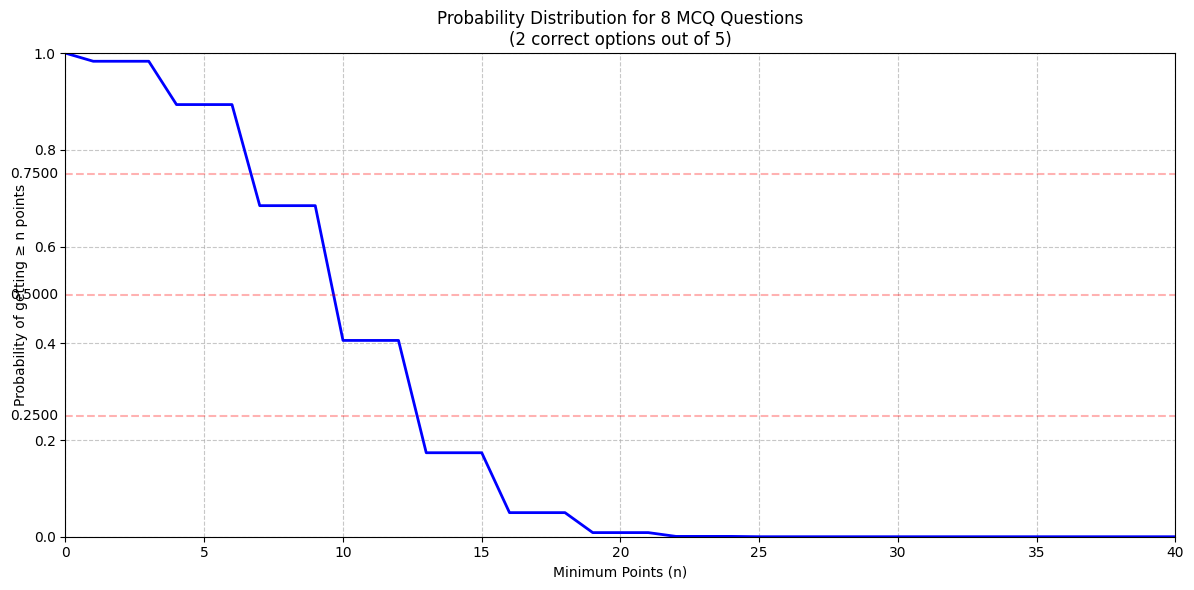

In [28]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

# Constants
NUM_QUESTIONS = 8
TOTAL_OPTIONS = 5
CORRECT_OPTIONS = 2
EPSILON = 1e-10  # For floating point comparisons

def verify_probability_distribution(probs, msg=""):
    """Verify that probabilities sum to 1"""
    total = sum(probs if isinstance(probs, list) else probs.values())
    assert abs(total - 1.0) < EPSILON, f"Probabilities sum to {total}, not 1.0 {msg}"
    return True

def calculate_question_probabilities():
    """Calculate probabilities of getting 0, 1, or 2 correct answers in a single question"""
    # Calculate probabilities
    p_correct_0 = (TOTAL_OPTIONS - CORRECT_OPTIONS)/TOTAL_OPTIONS  # 3/5
    p_correct_1 = CORRECT_OPTIONS/TOTAL_OPTIONS                    # 2/5
    p_correct_2 = 0  # impossible with single selection
    
    probs = [p_correct_0, p_correct_1, p_correct_2]
    
    # Verify probabilities
    verify_probability_distribution(probs, "in single question probabilities")
    
    # Calculate and print expected value for single question
    expected_per_question = 0 * p_correct_0 + 3 * p_correct_1 + 5 * p_correct_2
    print(f"\nSingle question statistics:")
    print(f"P(incorrect) = {p_correct_0:.3f}")
    print(f"P(one correct) = {p_correct_1:.3f}")
    print(f"P(two correct) = {p_correct_2:.3f}")
    print(f"Expected points per question = {expected_per_question:.3f}")
    
    return probs

def calculate_total_points_probability(question_probs, num_questions=NUM_QUESTIONS):
    """Calculate probability distribution of total points"""
    current_dist = {0: 1}
    verify_probability_distribution(current_dist)
    
    # Maximum possible points calculation
    points_per_correct = 3  # Points for one correct answer
    max_possible_points = num_questions * points_per_correct  # 8 * 3 = 24 points
    
    print(f"\nPoints calculation:")
    print(f"Maximum possible points = {max_possible_points}")
    print(f"Points per correct answer = {points_per_correct}")
    
    for q in range(num_questions):
        new_dist = {}
        for curr_points, curr_prob in current_dist.items():
            for outcome, outcome_prob in enumerate(question_probs):
                # Calculate points for this outcome
                if outcome == 0:    # incorrect
                    question_points = 0
                elif outcome == 1:  # one correct
                    question_points = 3
                else:              # two correct (impossible in this case)
                    question_points = 5
                    
                points = curr_points + question_points
                new_dist[points] = new_dist.get(points, 0) + curr_prob * outcome_prob
        
        verify_probability_distribution(new_dist, f"after question {q+1}")
        
        # Debug print
        print(f"Question {q+1}: Max points so far = {max(new_dist.keys())}")
        
        current_dist = new_dist
    
    return current_dist


def print_detailed_probabilities(point_probs, cumulative_probs):
    """Print detailed probability table for all points"""
    print("\nDetailed probability distribution:")
    print("Points | P(exactly) | P(at least)")
    print("--------|------------|-------------")
    
    for points in range(41):  # 0 to 40
        exact_prob = point_probs.get(points, 0)
        cumul_prob = cumulative_probs[points]
        print(f"{points:6d} | {exact_prob:10.6f} | {cumul_prob:11.6f}")

def calculate_cumulative_probabilities(point_probs, max_points=40):
    """Calculate probability of getting at least n points"""
    cumulative_probs = []
    for n in range(max_points + 1):
        prob = sum(prob for points, prob in point_probs.items() if points >= n)
        cumulative_probs.append(prob)
    
    # Verify monotonically decreasing
    for i in range(len(cumulative_probs)-1):
        assert cumulative_probs[i] >= cumulative_probs[i+1]
    
    return cumulative_probs

def plot_probabilities(cumulative_probs):
    """Create visualization of cumulative probabilities"""
    plt.figure(figsize=(12, 6))
    
    plt.plot(range(len(cumulative_probs)), cumulative_probs, 'b-', linewidth=2)
    
    # Add horizontal lines at key probabilities
    for prob in [0.25, 0.5, 0.75]:
        plt.axhline(y=prob, color='r', linestyle='--', alpha=0.3)
        plt.text(-2, prob, f'{prob:.4f}', verticalalignment='center')
    
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlabel('Minimum Points (n)')
    plt.ylabel('Probability of getting ≥ n points')
    plt.title(f'Probability Distribution for {NUM_QUESTIONS} MCQ Questions\n'
             f'({CORRECT_OPTIONS} correct options out of {TOTAL_OPTIONS})')
    
    plt.ylim(0, 1)
    plt.xlim(0, 40)
    plt.tight_layout()
    plt.show()

def main():
    # Calculate all probabilities
    question_probs = calculate_question_probabilities()
    point_probs = calculate_total_points_probability(question_probs)
    cumulative_probs = calculate_cumulative_probabilities(point_probs)
    
    # Calculate statistics
    expected_value = sum(points * prob for points, prob in point_probs.items())
    variance = sum(((points - expected_value) ** 2) * prob 
                  for points, prob in point_probs.items())
    std_dev = np.sqrt(variance)
    
    print(f"\nOverall statistics:")
    print(f"Expected total score: {expected_value:.4f} points")
    print(f"Standard deviation: {std_dev:.4f} points")
    
    # Print detailed probabilities
    print_detailed_probabilities(point_probs, cumulative_probs)
    
    # Plot results
    plot_probabilities(cumulative_probs)

if __name__ == "__main__":
    main()


cursor with ChatGPT o1-mini


Single question statistics:
P(0 correct) = 0.300
P(1 correct) = 0.600
P(2 correct) = 0.100
Expected points per question = 2.300

Overall statistics:
Expected total score: 18.40 points
Standard deviation: 4.57 points

Detailed probability distribution:
Points | P(exactly) |  P(at least)
----------------------------------
     0 |     0.0001 |       1.0000
     1 |     0.0000 |       0.9999
     2 |     0.0000 |       0.9999
     3 |     0.0010 |       0.9999
     4 |     0.0000 |       0.9989
     5 |     0.0002 |       0.9989
     6 |     0.0073 |       0.9987
     7 |     0.0000 |       0.9914
     8 |     0.0024 |       0.9914
     9 |     0.0294 |       0.9889
    10 |     0.0002 |       0.9595
    11 |     0.0147 |       0.9593
    12 |     0.0735 |       0.9446
    13 |     0.0024 |       0.8711
    14 |     0.0490 |       0.8687
    15 |     0.1177 |       0.8197
    16 |     0.0122 |       0.7020
    17 |     0.0980 |       0.6897
    18 |     0.1189 |       0.5918
    19 |    

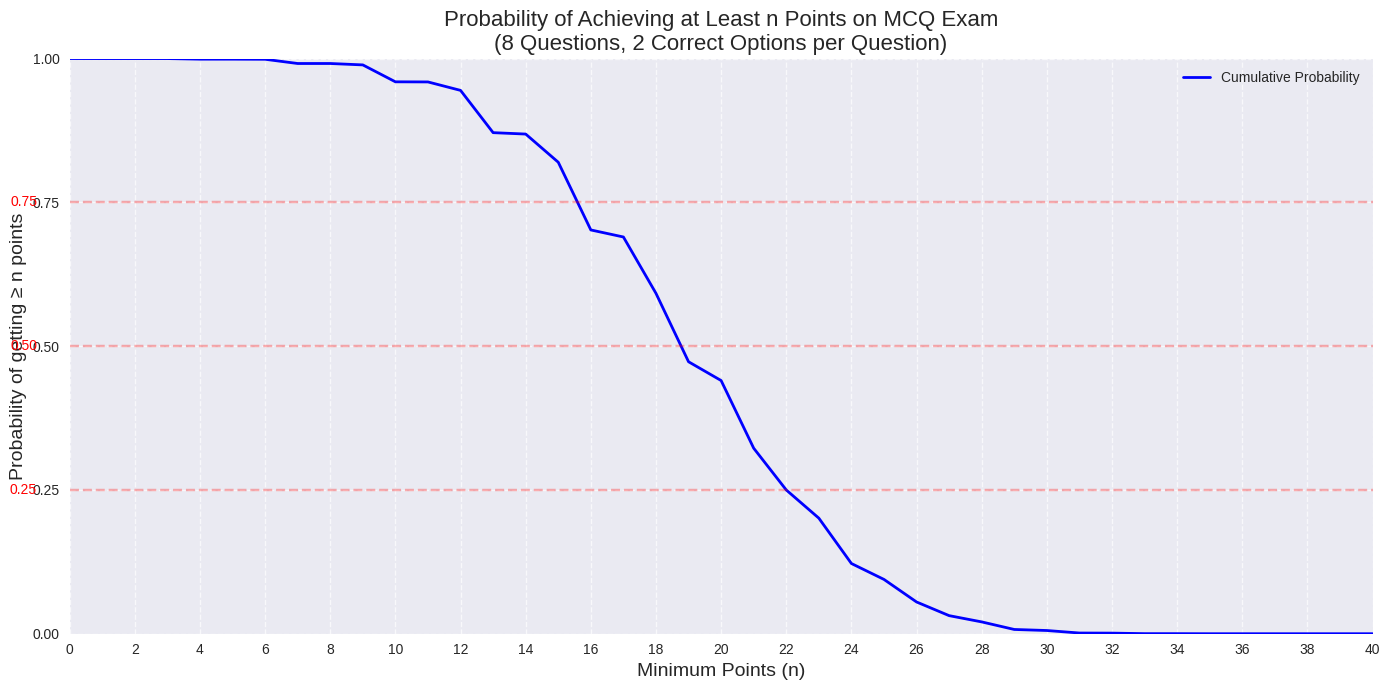

In [34]:
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt

# Constants
NUM_QUESTIONS = 8
TOTAL_OPTIONS = 5
CORRECT_OPTIONS = 2
EPSILON = 1e-10  # For floating point comparisons

def verify_probability_distribution(probs, msg=""):
    """Verify that probabilities sum to 1."""
    total = sum(probs.values()) if isinstance(probs, dict) else sum(probs)
    assert abs(total - 1.0) < EPSILON, f"Probabilities sum to {total}, not 1.0 {msg}"
    return True

def calculate_question_probabilities():
    """
    Calculate probabilities of getting 0, 1, or 2 correct answers in a single question.
    
    Returns:
        List of probabilities [P(0 correct), P(1 correct), P(2 correct)]
    """
    # Number of ways to select answers
    total_combinations = comb(TOTAL_OPTIONS, 2)  # Selecting 2 options per question
    
    # Number of ways to get exactly k correct answers
    p_correct_2 = comb(CORRECT_OPTIONS, 2) * comb(TOTAL_OPTIONS - CORRECT_OPTIONS, 0) / total_combinations  # Both correct
    p_correct_1 = comb(CORRECT_OPTIONS, 1) * comb(TOTAL_OPTIONS - CORRECT_OPTIONS, 1) / total_combinations  # Exactly one correct
    p_correct_0 = comb(CORRECT_OPTIONS, 0) * comb(TOTAL_OPTIONS - CORRECT_OPTIONS, 2) / total_combinations  # None correct
    
    probs = [p_correct_0, p_correct_1, p_correct_2]
    
    # Verify probabilities
    verify_probability_distribution(probs, "in single question probabilities")
    
    # Calculate and print expected value for single question
    expected_per_question = 0 * p_correct_0 + 3 * p_correct_1 + 5 * p_correct_2
    print(f"\nSingle question statistics:")
    print(f"P(0 correct) = {p_correct_0:.3f}")
    print(f"P(1 correct) = {p_correct_1:.3f}")
    print(f"P(2 correct) = {p_correct_2:.3f}")
    print(f"Expected points per question = {expected_per_question:.3f}")
    
    return probs

def calculate_total_points_probability(question_probs, num_questions=NUM_QUESTIONS):
    """
    Calculate the probability distribution of total points over all questions.
    
    Args:
        question_probs (list): Probabilities [P(0 correct), P(1 correct), P(2 correct)]
        num_questions (int): Number of MCQ questions
    
    Returns:
        dict: Mapping from total points to their probabilities
    """
    # Initialize with certainty of 0 points
    current_dist = {0: 1.0}
    verify_probability_distribution(current_dist, "in initial distribution")
    
    max_possible_points = num_questions * 5  # Maximum possible points (5 per question)
    
    for q in range(num_questions):
        new_dist = {}
        for curr_points, curr_prob in current_dist.items():
            for outcome, outcome_prob in enumerate(question_probs):
                # Assign points based on outcome
                if outcome == 0:    # 0 correct
                    question_points = 0
                elif outcome == 1:  # 1 correct
                    question_points = 3
                else:               # 2 correct
                    question_points = 5
                
                new_total = curr_points + question_points
                new_dist[new_total] = new_dist.get(new_total, 0) + curr_prob * outcome_prob
        
        verify_probability_distribution(new_dist, f"after question {q+1}")
        
        # Ensure points do not exceed maximum
        current_max = max(new_dist.keys())
        assert current_max <= max_possible_points, \
               f"Points exceed maximum possible ({current_max} > {max_possible_points}) after question {q+1}"
        
        current_dist = new_dist
    
    return current_dist

def calculate_cumulative_probabilities(point_probs, max_points=40):
    """
    Calculate the cumulative probabilities of scoring at least n points.
    
    Args:
        point_probs (dict): Mapping from total points to their probabilities
        max_points (int): Maximum score to consider
    
    Returns:
        list: Cumulative probabilities from 0 to max_points
    """
    cumulative_probs = []
    for n in range(max_points + 1):
        prob = sum(prob for points, prob in point_probs.items() if points >= n)
        cumulative_probs.append(prob)
    
    # Verify monotonically decreasing
    for i in range(len(cumulative_probs) - 1):
        assert cumulative_probs[i] >= cumulative_probs[i + 1], \
               "Cumulative probabilities must be monotonically decreasing"
    
    return cumulative_probs

def print_detailed_probabilities(point_probs, cumulative_probs):
    """
    Print a detailed probability table for all possible scores.
    
    Args:
        point_probs (dict): Mapping from total points to their probabilities
        cumulative_probs (list): Cumulative probabilities from 0 to max_points
    """
    print("\nDetailed probability distribution:")
    print(f"{'Points':>6} | {'P(exactly)':>10} | {'P(at least)':>12}")
    print("-" * 34)
    
    for points in range(41):  # 0 to 40
        exact_prob = point_probs.get(points, 0)
        cumul_prob = cumulative_probs[points] if points <= len(cumulative_probs)-1 else 0
        print(f"{points:6d} | {exact_prob:10.4f} | {cumul_prob:12.4f}")

def plot_probabilities(cumulative_probs):
    """
    Plot the cumulative probability of scoring at least n points.
    
    Args:
        cumulative_probs (list): Cumulative probabilities from 0 to max_points
    """
    plt.figure(figsize=(14, 7))
    
    plt.plot(range(len(cumulative_probs)), cumulative_probs, 'b-', linewidth=2, label='Cumulative Probability')
    
    # Add horizontal lines at key probability levels
    for prob in [0.25, 0.5, 0.75]:
        plt.axhline(y=prob, color='r', linestyle='--', alpha=0.3)
        plt.text(-1, prob, f'{prob:.2f}', verticalalignment='center', horizontalalignment='right', color='r')
    
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlabel('Minimum Points (n)', fontsize=14)
    plt.ylabel('Probability of getting ≥ n points', fontsize=14)
    plt.title(f'Probability of Achieving at Least n Points on MCQ Exam\n'
              f'({NUM_QUESTIONS} Questions, {CORRECT_OPTIONS} Correct Options per Question)', fontsize=16)
    
    plt.ylim(0, 1)
    plt.xlim(0, len(cumulative_probs)-1)
    plt.xticks(range(0, len(cumulative_probs), 2))
    plt.yticks([0, 0.25, 0.5, 0.75, 1.0])
    
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    # Calculate and verify all probabilities
    question_probs = calculate_question_probabilities()
    point_probs = calculate_total_points_probability(question_probs)
    verify_probability_distribution(point_probs, "in total points distribution")
    
    cumulative_probs = calculate_cumulative_probabilities(point_probs)
    
    # Calculate statistics
    expected_value = sum(points * prob for points, prob in point_probs.items())
    variance = sum(((points - expected_value) ** 2) * prob 
                  for points, prob in point_probs.items())
    std_dev = np.sqrt(variance)
    
    print(f"\nOverall statistics:")
    print(f"Expected total score: {expected_value:.2f} points")
    print(f"Standard deviation: {std_dev:.2f} points")
    
    # Print detailed probabilities
    print_detailed_probabilities(point_probs, cumulative_probs)
    
    # Plot results
    plot_probabilities(cumulative_probs)

if __name__ == "__main__":
    main()